# **Introduction**

In the rapidly evolving digital marketplace, an electronics store aims to stay ahead by optimizing its e-commerce platform. The primary goal of this project is to enhance marketing strategies and improve customer experience, thereby driving increased sales and fostering customer loyalty. To achieve this, the store seeks to gain a deeper understanding of customer behaviors, preferences, and purchasing patterns through advanced data analysis techniques.

Aim

The goal of the project is to enhance marketing strategies, improve customer experience, and ultimately increase sales and customer loyalty.

E-CommerceAnalytics_Project

# **Importing libraries**

In [1]:
import pandas as pd  # Data Manipulation and Analysis
import matplotlib    #  Comprehensive Library for Creating Static, Animated, and Interactive Visualizations
import matplotlib.pyplot as plt  # High-Level Interface for Interactive Visualizations
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.express as px
import seaborn as sns # Statistical Data Visualization Based on Matplotlib
import numpy as np    #  Fundamental Package for Numerical Computing
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pd.set_option('display.max_columns', None)  #handle all feature

In [3]:
os.getcwd()  #check the path

'/content'

In [4]:
# Mounting Google Drive and reading the dataset in csv file
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/kz.csv', encoding= 'unicode_escape')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **EDA - Exploratory data analysis**

In [5]:
missing_values = ["n/a", "na", "--","-", 'NaN']  #ensuring different types of missing values

In [6]:
data.shape # performing EDA to understand the size of the dataset

(2633521, 8)

In [7]:
data.head(5)  # to get a quick overview and for data validation

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


**Data Dictionaries**:

``event_time``: Represents the timestamp indicating the occurrence of a purchase or related event (e.g., adding to cart, viewing). Vital for analyzing purchase patterns across time.

``order_id``: A unique identifier assigned to each order, facilitating individual transaction tracking and crucial for distinguishing between different orders during analysis.

``product_id``: Unique identification for each product purchased, pivotal for product-level analysis and identification of specific items.

``category_id``: An exclusive identifier for the category of each product. Aids in categorizing products for comprehensive analysis.

``category_code``: Possibly a textual or descriptive representation of the product category. It offers a more intuitive understanding than category IDs regarding product types.

``brand``: Signifies the brand of the product, important for brand-level analysis and understanding customer brand preferences.

``price``: The selling price of the product. Essential for revenue analysis and comprehending purchasing patterns concerning different price points.

``user_id``: A distinctive identifier assigned to each customer. Enables analysis on a customer level, including purchase history, frequency, and preferences.

In [8]:
# I am creating multiple copies of data to not disturb the original dataset and use them as and when required.
df1=data.copy()

In [9]:
df2 = data.copy()

In [10]:
df1.head() #for getting the overview of the copy of the dataset

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [11]:
df1.shape #for understanding the size of the copy of the dataset

(2633521, 8)

In [12]:
df1.isnull().mean()  #for getting the percentage of missing values in each column

,0
event_time,0.000000
order_id,0.000000
product_id,0.000000
category_id,0.164021
category_code,0.232465
brand,0.192140
price,0.164021
user_id,0.785774


<Axes: >

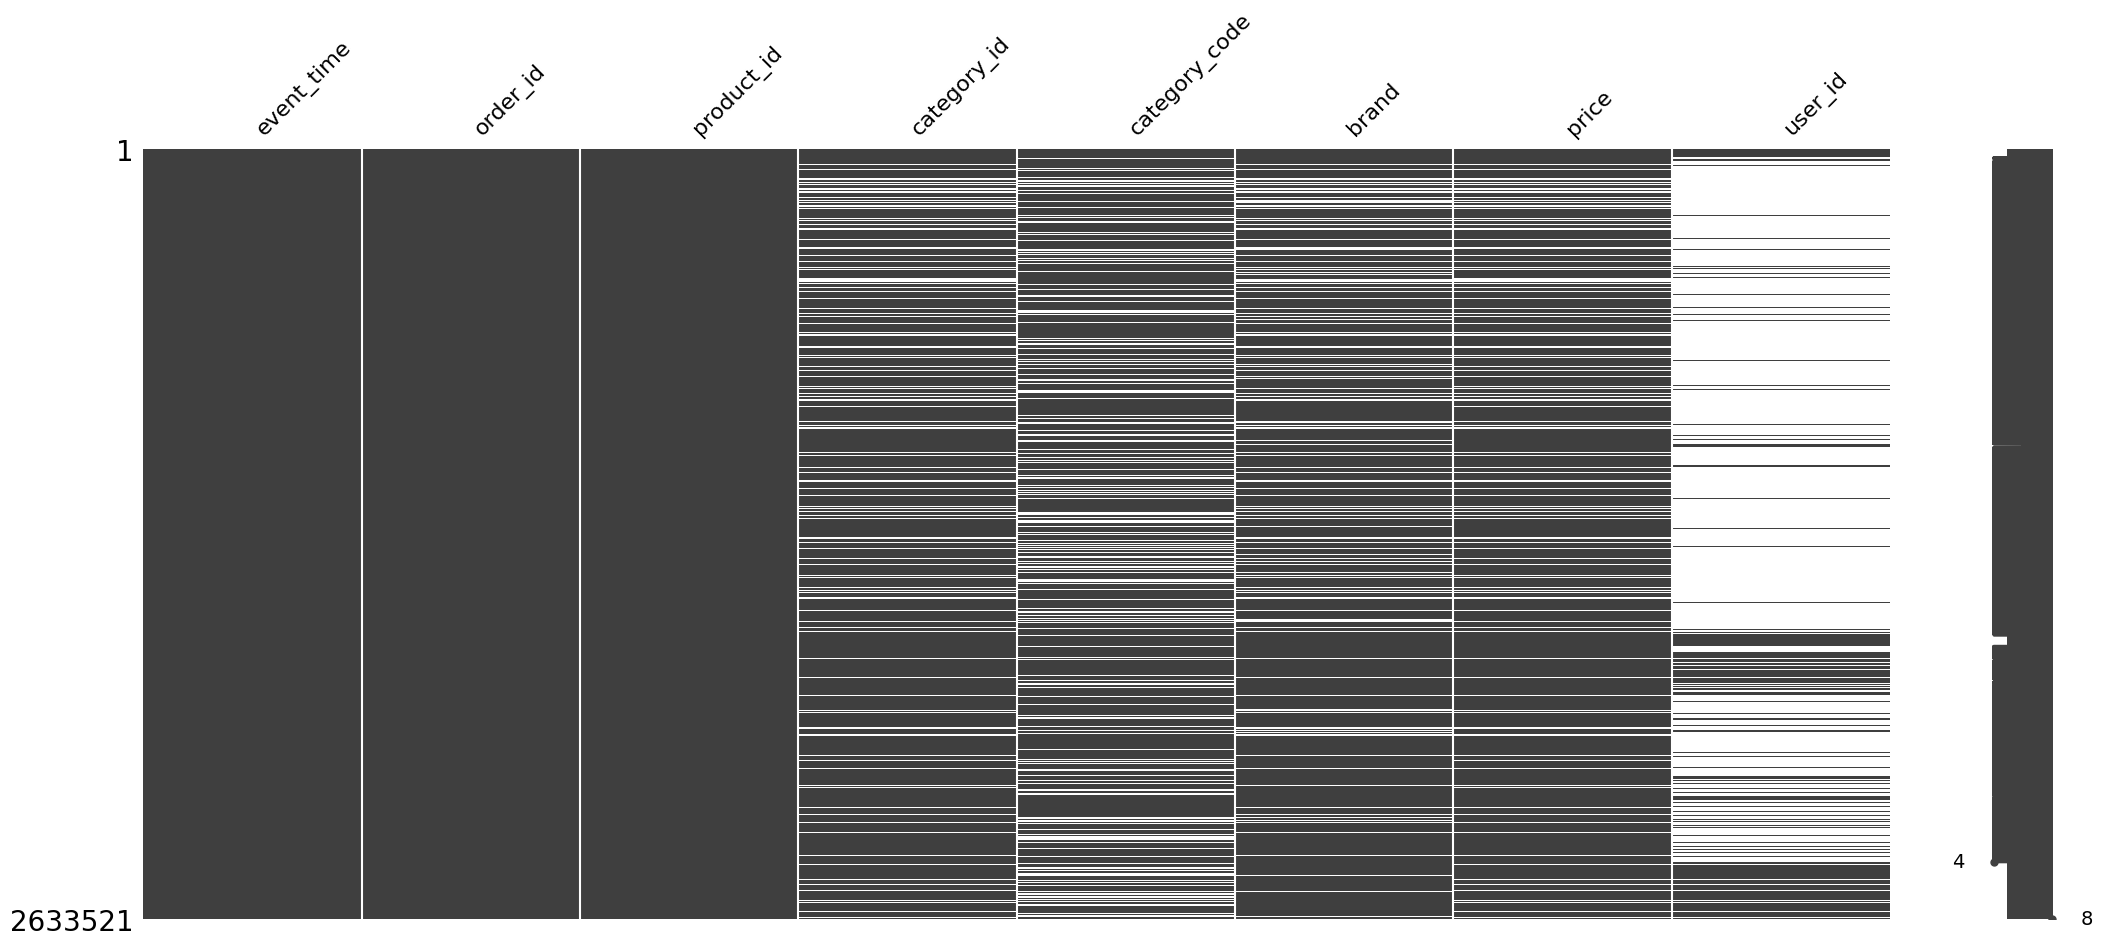

In [13]:
import missingno as msno # library to examine missing values
# creating matrix plot to see the pattern in missing values
msno.matrix(df1)

In [14]:
df1 = data.copy()

# **Data Cleaning**

In [15]:
#since user_id has 79% data as null vales, so we will drop that column
df1 = df1.drop(columns=['user_id'])

In [16]:
# Display the column names of df1

print(df1.columns)

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price'],
      dtype='object')


In [17]:
#imputing missing values
def missing_handle(df1,col):
    miss_prop = df1[col].isna().mean()
    if miss_prop >= 0.5: #drop column
        df1 = df1.drop(col,axis = 1)

    elif miss_prop >0.1: #imputation
        if df1[col].dtype != "object":
            Q3 = np.quantile(df1[col].dropna(),0.75)
            Q1 = np.quantile(df1[col].dropna(),0.25)
            iqr = Q3 - Q1
            UL = Q3+1.5*iqr
            LL = Q1-1.5*iqr
            num_outliers = len(df1[(df1[col]>UL) | (df1[col]<LL)]) #number of outliers rows
            if num_outliers >=1:
                df1[col] = df1[col].fillna(df1[col].median())
            else:
                df1[col] = df1[col].fillna(df1[col].mean())
        else:
            df1[col] = df1[col].fillna(df1[col].mode()[0]) #select first mode if multiple modes are present

    else: #drop rows
        df1.dropna(inplace = True)

In [18]:
#Imputing missing values using the created function
missing_handle(df1, "price")
missing_handle(df1, 'category_id')
missing_handle(df1, 'category_code')
missing_handle(df1, 'brand')

In [19]:
category_code_mode = df1['category_code'].mode()[0]
brand_mode = df1['brand'].mode()[0]

In [20]:
category_code_mode

'electronics.smartphone'

In [21]:
brand_mode

'samsung'

In [22]:
df1.isnull().mean()

,0
event_time,0.0
order_id,0.0
product_id,0.0
category_id,0.0
category_code,0.0
brand,0.0
price,0.0


In [23]:
df1.duplicated().sum() #getting the total of duplicate values

675

In [24]:
df1.drop_duplicates(inplace=True) #dropping the duplicate values since it has no use in the dataset

In [25]:
df1.shape #after removing duplicates checking the size of the dataset

(2632846, 7)

In [26]:
df1.describe() #to check the statistics of the dataset

,order_id,product_id,category_id,price
count,2.632846e+06,2.632846e+06,2.632846e+06,2.632846e+06
mean,2.361783e+18,1.674072e+18,2.272888e+18,1.379209e+02
std,1.716164e+16,3.102174e+17,2.162052e+16,2.241891e+02
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00
25%,2.348807e+18,1.515966e+18,2.268105e+18,2.081000e+01
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.617800e+02
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04


In [27]:
# Strip leading and trailing spaces from column names
df1.columns = df1.columns.str.strip()

In [28]:
df1.info()  #information of the dataset about the datatype of each column, count and null values

<class 'pandas.core.frame.DataFrame'>
Index: 2632846 entries, 0 to 2633520
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
dtypes: float64(2), int64(2), object(3)
memory usage: 160.7+ MB


In [ ]:
df1['event_time'] = pd.to_datetime(df1['event_time']) #converting the datatype of event_time into datetime

In [ ]:
#Use describe for specific column
df1[['price']].describe()

# **Identifying Outliers: Boxplot for each feature column**

In [ ]:
# here why im using subplot ,'organize multiple visualizations within a single figure'

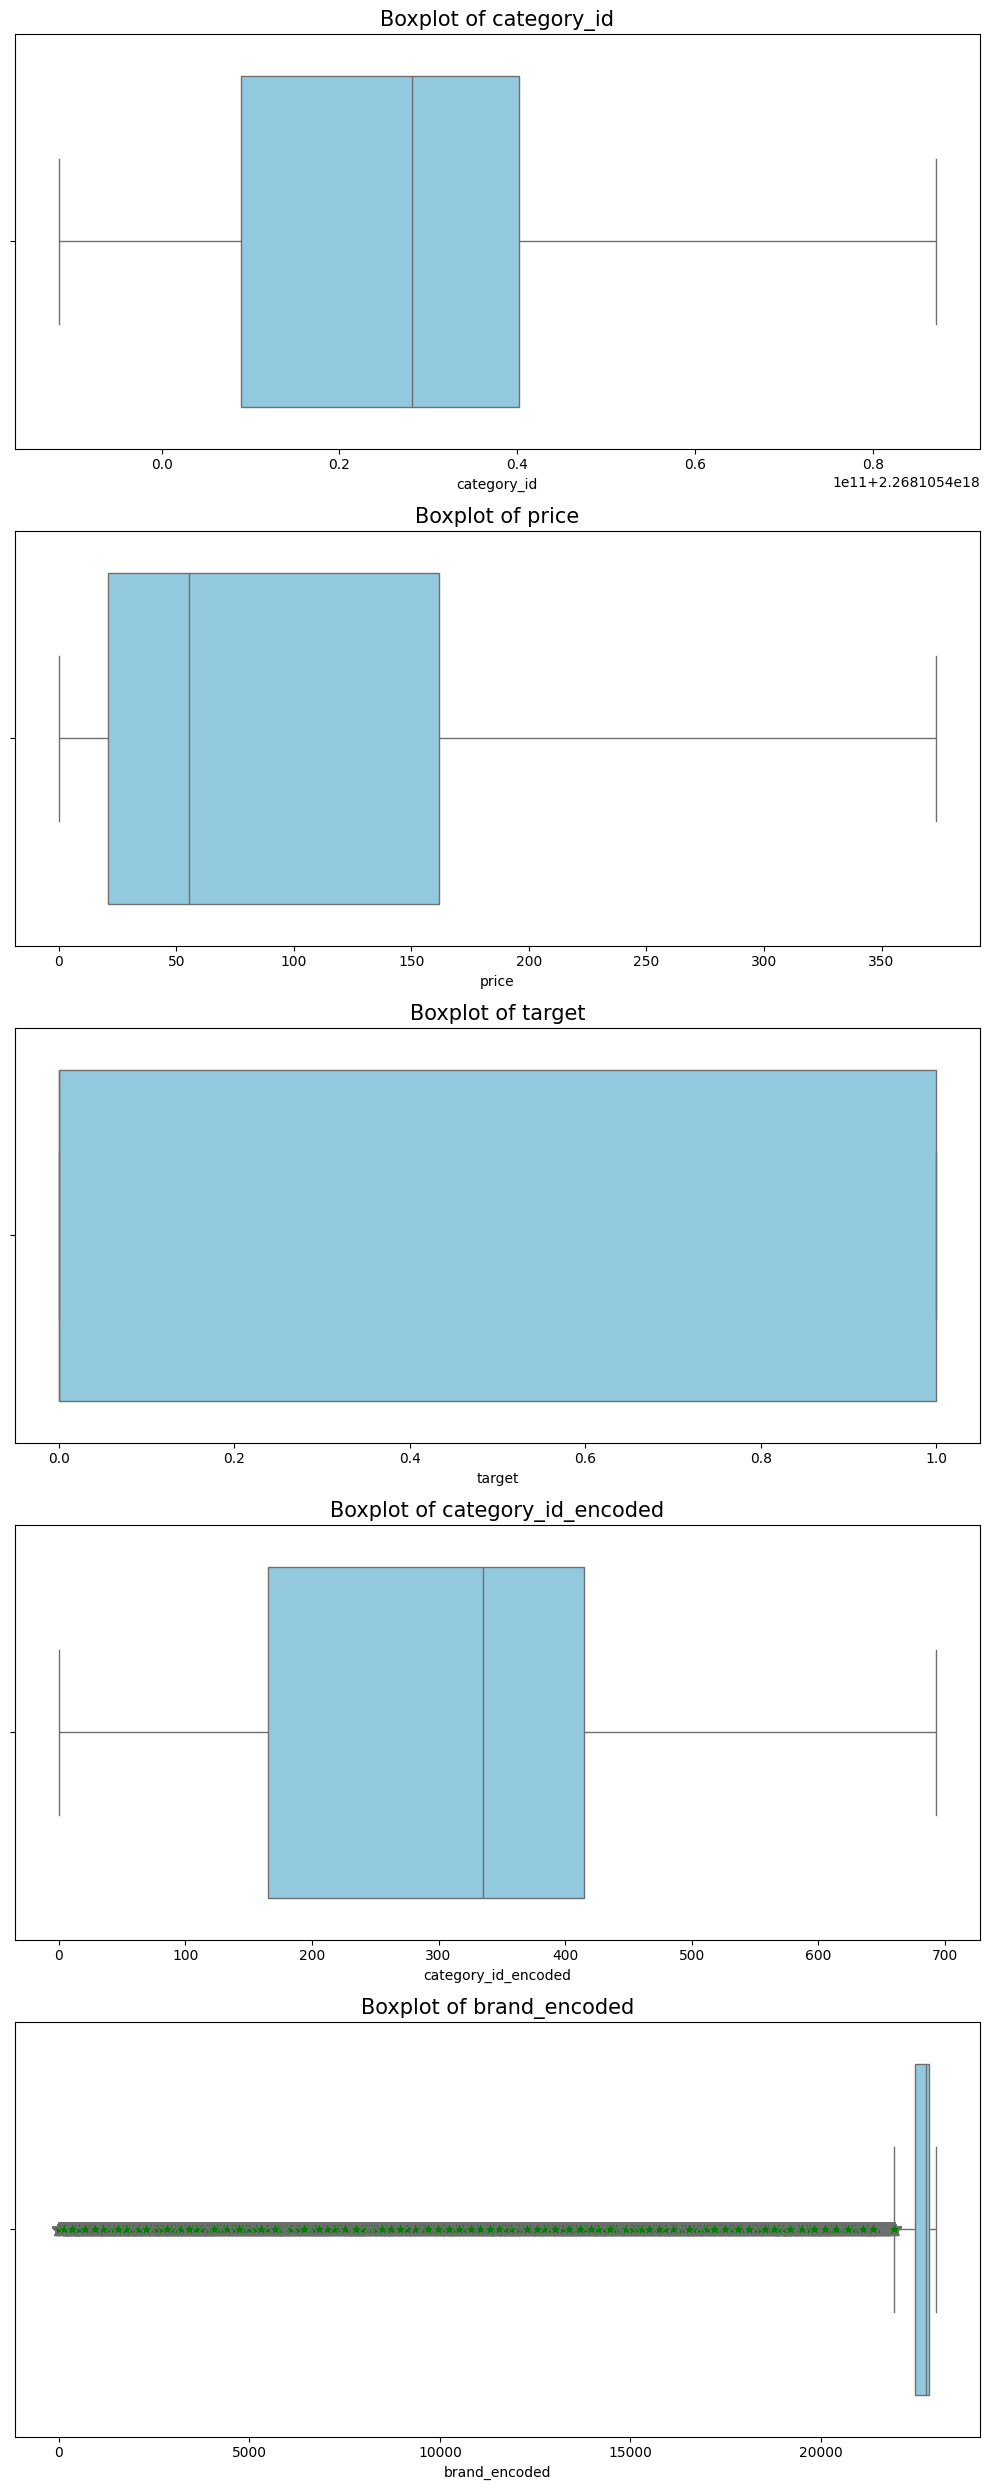

In [85]:
# Select numeric columns for boxplots
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, len(numeric_cols) * 5))

# Create a grid of boxplots for each numeric column using a 'for' loop
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df1[col], color='skyblue', flierprops=dict(marker='*', markersize=10, markerfacecolor='green', linestyle='none'))
    plt.title(f'Boxplot of {col}', fontsize=15)  # Giving title

plt.tight_layout()
plt.show()

# **Outlier Treatment: Handling and Adjusting Outliers in the Dataset**

In [86]:
# Technique for detecting and treating outliers using the Interquartile Range (IQR) method.

# Loop through each column in the DataFrame
for column in df1.columns:
    # Only apply IQR technique to numeric columns
    if pd.api.types.is_numeric_dtype(df1[column]):
        q1 = df1[column].quantile(0.25)    # First Quartile
        q3 = df1[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                      # Interquartile Range

        llimit = q1 - 1.5 * IQR            # Lower Limit
        ulimit = q3 + 1.5 * IQR            # Upper Limit

        # Clip values in the column to llimit and ulimit
        df1[column] = df1[column].clip(lower=llimit, upper=ulimit)

    else:
        print(f"Skipping non-numeric column: {column}")

Skipping non-numeric column: event_time
Skipping non-numeric column: category_code
Skipping non-numeric column: brand
Skipping non-numeric column: month_year


# **Post-Treatment Outlier Analysis: Boxplots for Updated Feature Distributions**

In [ ]:
# Set up the matplotlib figure
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, len(numeric_cols) * 5))

# Create a grid of boxplots for each numeric column using a 'for' loop
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df1[col], color='skyblue', flierprops=dict(marker='*', markersize=10, markerfacecolor='green', linestyle='none'))
    plt.title(f'Boxplot of {col}', fontsize=15)  # Giving title

plt.tight_layout()
plt.show()

In [ ]:
# Note: For outliers, statistically it is good to treat extreme outliers (+3 * IQR and -3 * IQR). Minor outliers are OK.

# After handling the extreme outliers by capping values beyond the ±3 * IQR limits, the data distribution has improved.
# Boxplots show that the extreme outliers are effectively managed, resulting in a cleaner and more reliable dataset.
# This makes the data better for future analysis and modeling.

# **Feature Engineering**

In [ ]:
# Extracting features from event_time
df1['day_of_week'] = df1['event_time'].dt.dayofweek
df1['hour'] = df1['event_time'].dt.hour


# **Answering 15 problem Statement**

In [ ]:
# Identify the Top 10 Most Expensive Products

In [ ]:
top_10_expensive_products = df1.groupby('product_id')['price'].mean().nlargest(10).reset_index()
top_10_expensive_products

In [39]:
# calculate the average order value

In [40]:
average_order_value = round(df1.groupby('order_id')['price'].sum().mean(), 2)
print(f'Average Order Value: {average_order_value}')


Average Order Value: 199.68


In [41]:
# Determine the most popular product categories

In [42]:
category_popularity = df1.groupby('category_code')['product_id'].count().nlargest(10).reset_index()
category_popularity

,category_code,product_id
0,electronics.smartphone,969634
1,appliances.kitchen.refrigerators,77371
2,16.18,72969
3,electronics.video.tv,71695
4,computers.notebook,71416
5,appliances.environment.vacuum,66438
6,electronics.audio.headphone,66141
7,appliances.kitchen.kettle,62702
8,appliances.kitchen.washer,56236
9,furniture.kitchen.table,55716


In [43]:
# Determine which brand has highest sales

In [44]:
sales_by_brand = df1.groupby('brand')['price'].sum().sort_values(ascending=False).reset_index()
sales_by_brand


,brand,price
0,samsung,9.771446e+07
1,apple,2.334998e+07
2,lg,1.880098e+07
3,huawei,1.018742e+07
4,bosch,8.582149e+06
...,...,...
23016,whiskas,6.000000e-01
23017,pedigree,2.300000e-01
23018,montblanc,2.200000e-01
23019,kitekat,2.100000e-01


In [45]:
# Finding peak purchase hours of each day of the week

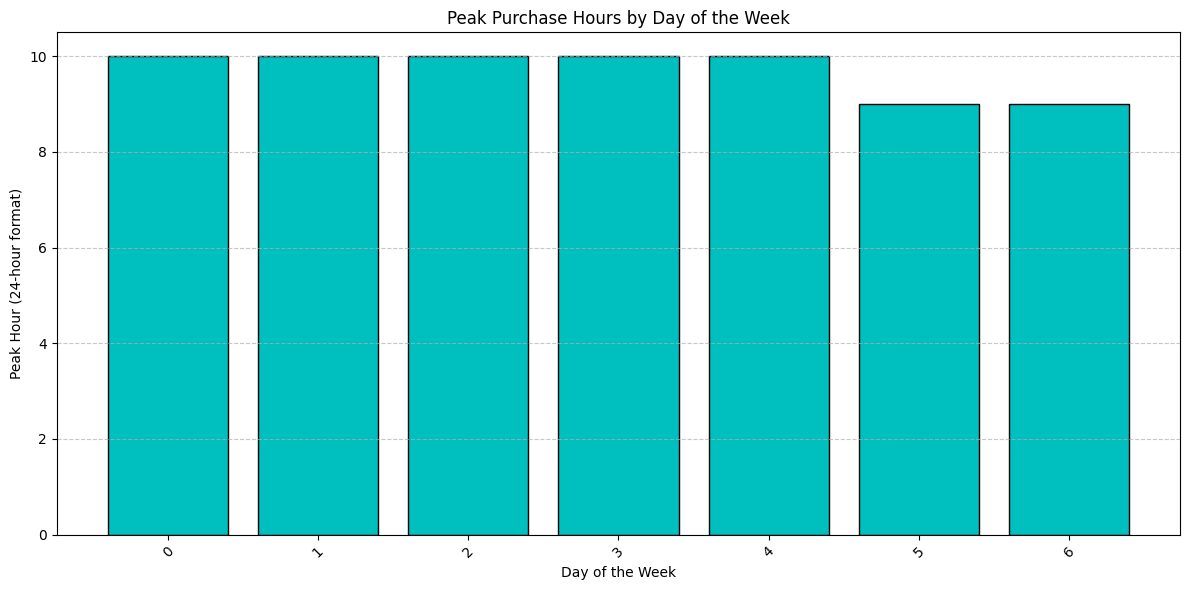

In [46]:
purchase_times = df1.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Find peak hours for each day of the week
peak_times = purchase_times.idxmax(axis=1).reset_index()
peak_times.columns = ['day_of_week', 'peak_hour']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(peak_times['day_of_week'], peak_times['peak_hour'].astype(str).astype(int), color='c', edgecolor='k')
plt.title('Peak Purchase Hours by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Peak Hour (24-hour format)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust plot to fit labels and titles
plt.show()

In [47]:
# Identify the frequency of purchases for different products.

In [48]:
purchase_frequency = df1['product_id'].value_counts().reset_index()
purchase_frequency

,product_id,count
0,1515966223544584192,549624
1,1515966223523303302,44491
2,1515966223523303301,41076
3,1515966223523303308,38786
4,1515966223523303310,38472
...,...,...
16005,1515966223510600357,1
16006,1515966223512245190,1
16007,1515966223509258208,1
16008,1515966223511248021,1


In [49]:
# Analyze the impact of price changes on sales volume.

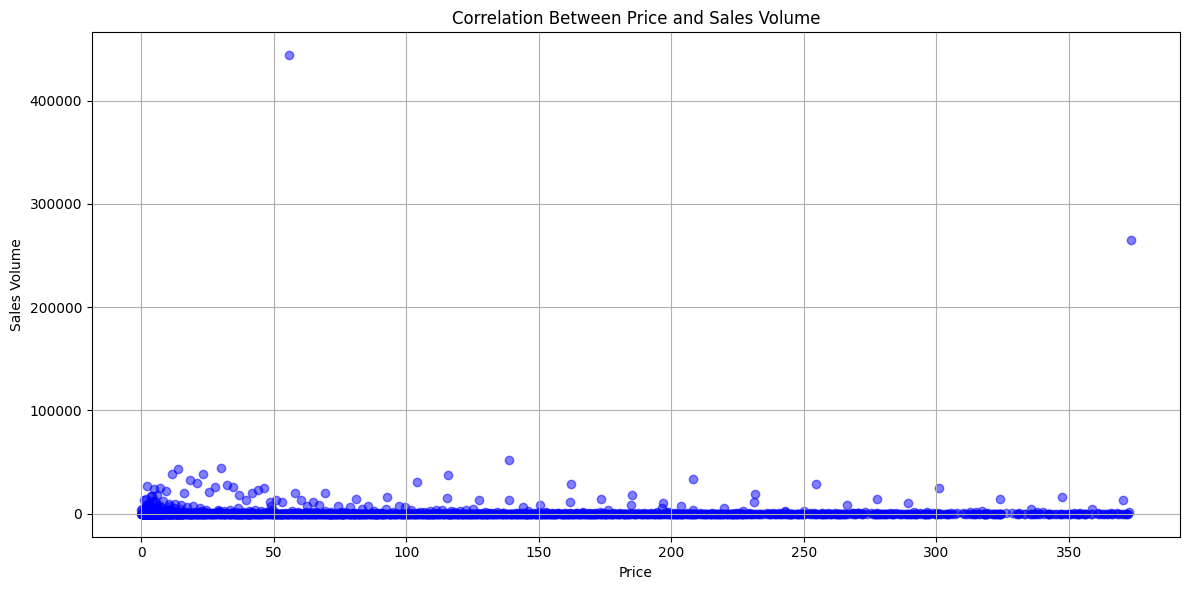

In [50]:
# Calculate the correlation between price and sales volume
price_sales_correlation = df1[['price', 'order_id']].groupby('price').count().reset_index()
price_sales_correlation.columns = ['price', 'sales_volume']

# Plot the correlation
plt.figure(figsize=(12, 6))
plt.scatter(price_sales_correlation['price'], price_sales_correlation['sales_volume'], color='b', alpha=0.5)
plt.title('Correlation Between Price and Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


In [51]:
# Identify trends in sales over time.

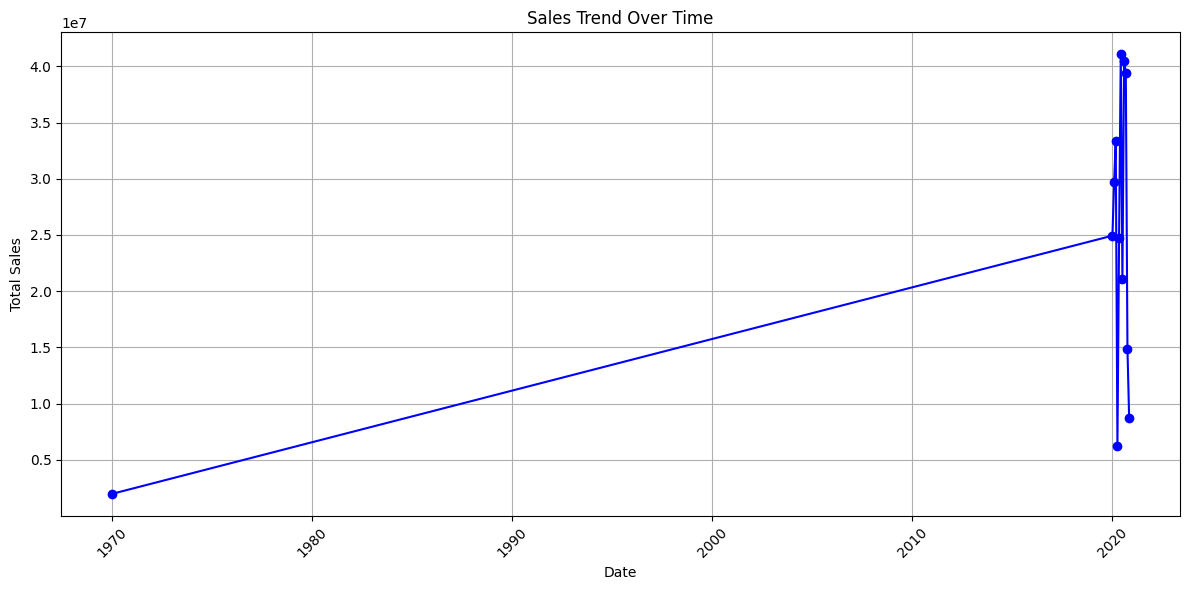

In [52]:
# Group by month and sum the sales
sales_trend = df1.groupby(df1['event_time'].dt.to_period('M'))['price'].sum()

# Convert PeriodIndex to datetime for plotting
sales_trend.index = sales_trend.index.to_timestamp()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [53]:
# Analyze how spending is distributed across different categories

In [54]:
category_spend_distribution = df1.groupby('category_code')['price'].sum().sort_values().reset_index()
category_spend_distribution

,category_code,price
0,country_yard.watering,2.882000e+01
1,apparel.costume,4.277000e+01
2,41.90,5.553000e+01
3,226.37,5.553000e+01
4,73.59,5.553000e+01
...,...,...
505,appliances.kitchen.washer,1.660552e+07
506,computers.notebook,1.762217e+07
507,electronics.video.tv,2.015954e+07
508,appliances.kitchen.refrigerators,2.223311e+07


In [55]:
#  Determine the distribution of order values.

In [56]:
order_value_distribution = df1.groupby('order_id')['price'].sum().describe().reset_index()
order_value_distribution


,index,price
0,count,1.435253e+06
1,mean,1.996823e+02
2,std,2.314746e+02
3,min,0.000000e+00
4,25%,3.236000e+01
5,50%,1.157200e+02
6,75%,3.284200e+02
7,max,6.102745e+03


In [57]:
# Examine the correlation between price and sales volume.

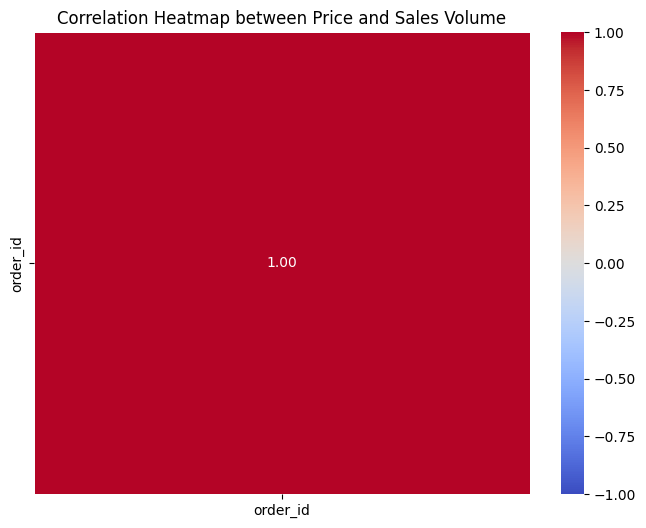

In [58]:
# Calculate the correlation matrix between price and sales volume
price_sales_correlation = df1[['price', 'order_id']].groupby('price').count().corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(price_sales_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Sales Volume')
plt.show()

In [59]:
# Segment customers based on their purchase patterns and behaviors.

In [60]:
# Use clustering techniques such as K-Means for segmentation.
from sklearn.cluster import KMeans
import numpy as np

# Create feature matrix for clustering
features = df1.groupby('order_id').agg({'price': 'sum'}).reset_index()
kmeans = KMeans(n_clusters=3, random_state=0).fit(features[['price']])
features['segment'] = kmeans.labels_
features.head()


,order_id,price,segment
0,2297321445968052736,2559.86,0
1,2297729407910937541,0.02,1
2,2297770405059888020,300.90,2
3,2297817716758675935,6.23,1
4,2297818341995184662,7.85,1


In [61]:
# What is the average price of products within each category?

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average price per product category
average_price_per_category = df1.groupby('category_code')['price'].mean().sort_values(ascending = False)

average_price_per_category

,price
category_code,
appliances.kitchen.dishwasher,358.379961
apparel.glove,351.660956
appliances.kitchen.oven,342.774820
kids.skates,339.143003
electronics.camera.video,306.162047
...,...
kids.dolls,7.366653
furniture.bedroom.bed,7.176124
country_yard.watering,5.764000


In [63]:
# Identify monthly sales distribution by top 10 product category

<Figure size 2000x6000 with 0 Axes>

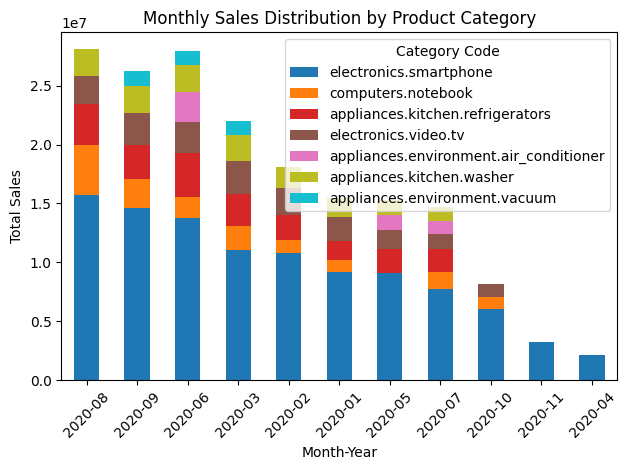

In [64]:
# Extract month and year from event_time
df1['month_year'] = df1['event_time'].dt.to_period('M')

# Group by month, year, and category_code, then sum the sales
monthly_sales_by_category = df1.groupby(['month_year', 'category_code'])['price'].sum().nlargest(50).unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 60))
monthly_sales_by_category.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Monthly Sales Distribution by Product Category')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category Code')
plt.tight_layout()
plt.show()

In [65]:
# Top 5 brands have the highest customer loyalty, measured by the number of repeat purchases within the same brand?

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Since 'user_id' was removed earlier, we can't use it directly for customer loyalty analysis.
# We'll focus on order_id assuming each order represents a unique purchase, and 'product_id' corresponds to a specific brand.

# Count the number of orders per brand
brand_order_counts = df1.groupby('brand')['order_id'].nunique().nlargest(5).reset_index()
brand_order_counts.columns = ['brand', 'unique_orders']

# Sort by number of unique orders (proxy for loyalty if users tend to repurchase)
brand_order_counts = brand_order_counts.sort_values(by='unique_orders', ascending=False)

brand_order_counts

,brand,unique_orders
0,samsung,524387
1,ava,109980
2,apple,70226
3,tefal,69816
4,huawei,51932


Understanding the distribution of price


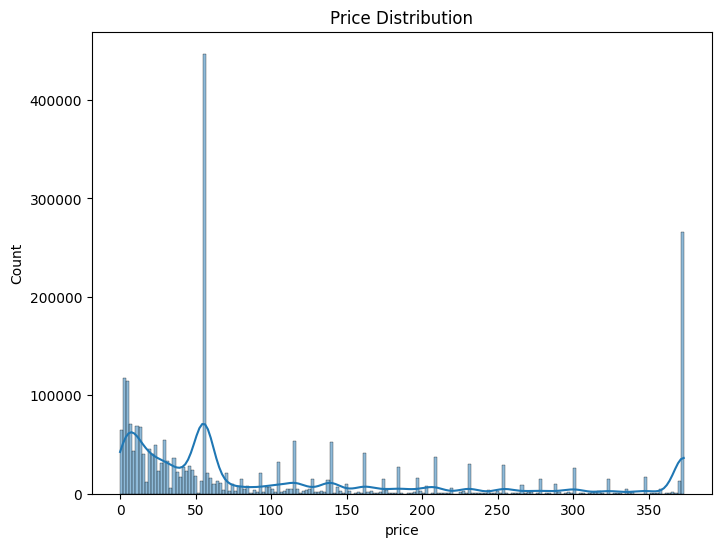

In [67]:
# Visualizing price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df1['price'], kde=True)
plt.title('Price Distribution')
plt.show()

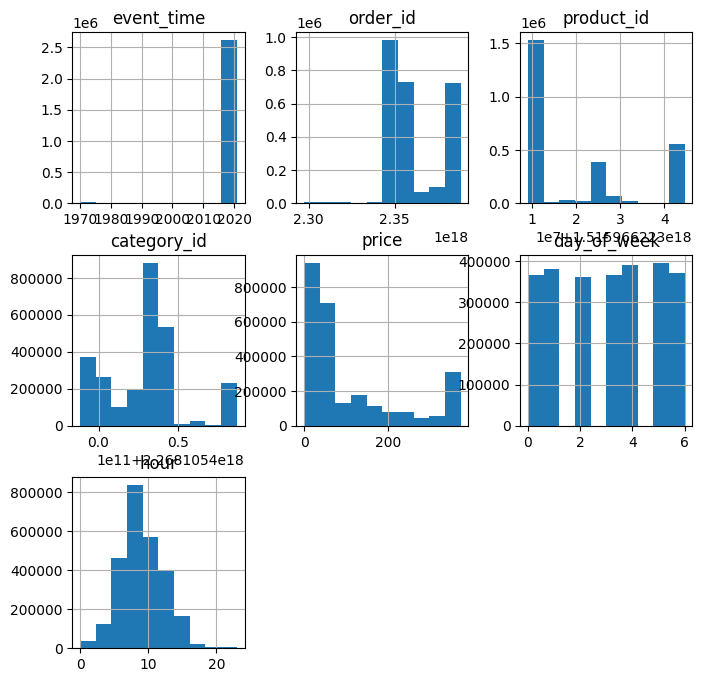

In [68]:
# for understanding the shape of the data distribution (e.g., normal, skewed, bimodal)
# Generate histograms for each numerical column
df1.hist(figsize=(8, 8))
plt.show()

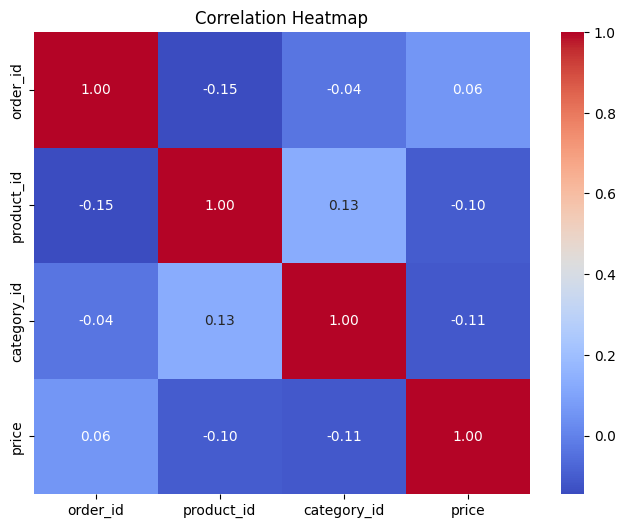

In [69]:
# Compute the correlation matrix
corr_matrix = df1[['order_id', 'product_id', 'category_id', 'price']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There is a weak correlation between each of the columns

# **Prediction Model: Random Forest**

**`Objective`**: Predict whether a customer is likely to purchase a product based on features like browsing behavior, product category, and brand.
Predict if a customer will buy a high-priced item (e.g. price > $100)

In [74]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [72]:
# target variable: whether the price is above $100 (indicating a purchase decision)
df1['target'] = (df1['price'] > 100).astype(int)


In [75]:
# Initialize LabelEncoder
le = LabelEncoder()

In [77]:
# Encode categorical features
df1['category_id_encoded'] = le.fit_transform(df1['category_id'])
df1['brand_encoded'] = le.fit_transform(df1['brand'])


In [79]:
# Features and target variable
X = df1[['price', 'category_id_encoded', 'brand_encoded']]  # Use encoded features
y = df1['target']

In [80]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [82]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [83]:
# Make predictions
y_pred = model.predict(X_test)

In [84]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    519233
           1       1.00      1.00      1.00    270621

    accuracy                           1.00    789854
   macro avg       1.00      1.00      1.00    789854
weighted avg       1.00      1.00      1.00    789854

